# Analysis of the German league (Bundesliga)
This article is a journey through the history of the Bundesliga. Analyzing historical data (all classifications from 1963 until 2020), we will be able to answer many questions about the German league. What teams won the German league? What teams nearly won the Bundesliga? When did Bayern's hegemony start? What teams receive more penalties? … and many more! Continue reading

# Introduction
Let's make a brief introduction for those that have never heard about the German league. 🙌

The German football league commonly known as the Bundesliga is the first national football league in Germany, being one of the most popular professional sports leagues across the world. It was founded in 1963 after the unification of five regional leagues from West Germany and consisted initially of 16 teams.

At the end of a match, the winning team is rewarded with three points (before the season 1995–96 with 2 points) and the losing team with zero. In case of a tie, both teams are rewarded with 1 point.

In many European leagues, the bottom three teams are automatically relegated to the second division. On the contrary, in the Bundesliga, only the bottom two are directly relegated to the 2 Bundesliga. The 16th team in the Bundesliga and the 3th in the 2 Bundesliga contest a two-legged play-off for a place in the first division.

The introduction is made! Now, we are ready to analyze the data ❤️

# Web data extraction
The historical data of the Bundesliga (from 1963 until 2020) was scraped from https://www.bdfutbol.com/. This website contains football rankings of the best European leagues.

To scrape the data, we have used BeautifulSoup which is a popular Python library for extracting information from an HTML page. After obtaining all the data, we have stored it in a Pandas data frame for further processing.

In [288]:
import time

import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# the web page bdfutbol contains historical data about multiple european leagues - we have selected the german league
web_page = 'https://www.bdfutbol.com/es/t/'
league = 't.html#ger'

# obtain the html code as a string
response = requests.get(web_page + league)
html = response.text

# create a BeautifulSoup object
soup = bs4.BeautifulSoup(html, "html.parser")
df_scores = pd.DataFrame()

# loop through the anchor tags
for anchor in soup.find_all(class_="bloc_temporades")[4].find_all('a'):
    
    # get the hypertext reference and the text of the anchor tag
    page = anchor.get('href')
    season = anchor.text
    
    # obtain the html code as a string
    response = requests.get(web_page + page)
    html = response.text

    # create a BeautifulSoup object
    soup = bs4.BeautifulSoup(html, "html.parser")
    
    # obtain the table containing the annual classification
    table = soup.find(class_="taula_estil sortable")
    df_league = pd.read_html(str(table))[0]
    
    # add the season - anchor text and append the data frame to df_scores 
    df_league['season'] = season
    df_scores = df_scores.append(df_league)
    
    time.sleep(0.2)

# visualize the first five rows of the scraped data frame
df_scores.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Puntos,PJ,PG,PE,PP,GF,GC,TA,TR,season
0,NaN,1,NaN,Bayern München,82,34,26,4,4,100,32,52,3,2019-20
1,NaN,2,NaN,Borussia Dortmund,69,34,21,6,7,84,41,48,1,2019-20
2,NaN,3,NaN,RB Leipzig,66,34,18,12,4,81,37,50,3,2019-20
3,NaN,4,NaN,Borussia Mönchengladbach,65,34,20,5,9,66,40,74,3,2019-20
4,NaN,5,NaN,Bayer Leverkusen,63,34,19,6,9,61,44,58,6,2019-20


# Data Cleaning
Data Cleaning is the process of transforming raw data into a standardized form that can easily be analyzed with data analytics tools. In this particular case, before analyzing the data using Pandas, we perform a few cleaning operations. First, we remove unnecessary columns and rename the remaining ones using English terms (remember that the data was scraped from a Spanish website). Then, we modify the wrong data types. The column points (points obtained by a team during a particular season) is of data type object instead of integer due to the presence of asterisks. These asterisks are used to refer to explanations at the bottom of the web page and they are not relevant for this analysis. In fact, the data type is not imported correctly because of the existence of these asterisks in some entries of the column. Therefore, we have to remove them, before converting the column points to an integer data type.

### Drop unnecessary columns

In [289]:
# drop the columns Unnamed:0 and Unnamed:2 - they do not contain valuable information
df_scores.drop(columns=['Unnamed: 0', 'Unnamed: 2'], inplace=True)

In [290]:
# check that the modification has been carried out properly
df_scores.columns

Index(['Unnamed: 1', 'Unnamed: 3', 'Puntos', 'PJ', 'PG', 'PE', 'PP', 'GF',
       'GC', 'TA', 'TR', 'season'],
      dtype='object')

### Rename the columns using English terms

In [291]:
# rename the columns 
df_scores.rename({'Unnamed: 1': 'position', 'Unnamed: 3': 'club', 'Puntos': 'points', 'PJ': 'played', 'PG': 'won',
                  'PE': 'drawn', 'PP': 'lost', 'GF': 'goals_for', 'GC': 'goals_against', 'TA': 'yellow_card',
                  'TR': 'red_card'}, axis=1, inplace=True)

In [292]:
# check that the modification has been carried out properly
df_scores.columns

Index(['position', 'club', 'points', 'played', 'won', 'drawn', 'lost',
       'goals_for', 'goals_against', 'yellow_card', 'red_card', 'season'],
      dtype='object')

### Modify incorrect data types

In [293]:
# in some cases the entries in the column (points) contain additional symbols
df_scores.points = df_scores.points.astype(str)

# remove the symbols extracting only the digits
df_scores.points = df_scores.points.str.extract('(\d+)')

In [294]:
# check that the modification has been carried out properly
df_scores.points.unique()

array(['82', '69', '66', '65', '63', '52', '49', '48', '45', '41', '39',
       '37', '36', '31', '30', '20', '78', '76', '58', '55', '54', '53',
       '51', '44', '43', '33', '32', '28', '21', '19', '84', '47', '42',
       '22', '67', '64', '62', '38', '25', '88', '60', '50', '40', '79',
       '61', '46', '35', '34', '90', '71', '27', '26', '91', '81', '73',
       '23', '75', '68', '29', '70', '59', '57', '24', '77', '18', '74',
       '56', '16', '17', '14', '12', '0', '8'], dtype=object)

In [295]:
# convert columns (points) into int data type
df_scores.points = df_scores.points.astype(int)

After cleaning the data, we obtain a Pandas data frame that can be easily processed to extract conclusions. As shown below, the data frame contains information such as the number of games won, drawn, and lost, the number of yellow and red cards, the number of points, and the position in the ranking of all teams that took part in the Bundesliga from 1963 until 2020.

In [296]:
df_scores.head()

,position,club,points,played,won,drawn,lost,goals_for,goals_against,yellow_card,red_card,season
0,1,Bayern München,82,34,26,4,4,100,32,52,3,2019-20
1,2,Borussia Dortmund,69,34,21,6,7,84,41,48,1,2019-20
2,3,RB Leipzig,66,34,18,12,4,81,37,50,3,2019-20
3,4,Borussia Mönchengladbach,65,34,20,5,9,66,40,74,3,2019-20
4,5,Bayer Leverkusen,63,34,19,6,9,61,44,58,6,2019-20


# German league winners
The Bundesliga has been played by 57 different clubs during its 57 years of existence (up to the season 2019–20); however, only twelve of them got their hands on the trophy. The following plot shows the German league winners from season 1963–64 until 2019–20.

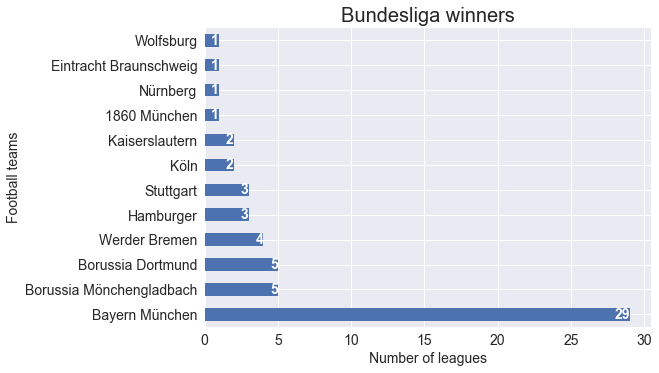

In [297]:
# teams that won the Bundesliga
first_position = df_scores[df_scores['position'] == 1].club.value_counts()

# plot labels indicating the number of leagues
for i, value in enumerate(first_position):
     plt.text(value, i, str(value), horizontalalignment='right', verticalalignment='center', weight='bold', color='white', fontsize=14)

# plot the results using an horizontal bar plot
first_position.plot(kind='barh')

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Number of leagues', fontsize=14)
plt.ylabel('Football teams', fontsize=14)
plt.title('Bundesliga winners', fontsize=20);

As shown above, Bayern München is the most successful club in the history of the Bundesliga with 29 titles, which represents more than 50% of the leagues. The next most successful teams are Borussia Mönchengladbach and Borussia Dortmund which has won the Bundesliga five times. Apart from them, other teams such as Werder Bremen, Hamburger, Stuttgart, Köln, and Kaiserslautern also had the honor of lifting the Bundesliga trophy multiple times.

In [225]:
# number of clubs that played in the Bundesliga at least one season
df_scores.club.nunique()

57

In [226]:
# number of clubs that won the Bundesliga
df_scores[df_scores['position'] == 1].club.nunique()

12

In [227]:
# number of seasons
df_scores.season.nunique()

57

# German league runner-ups
There are 6 football teams that have never won the league but they were on one or more occasions runner-ups: Alemannia Aachen, Bayer Leverkusen, Hertha Berliner, Meidericher, RB Leipzig, and Schalke 04. As shown below, Schalke 04 and Bayer Leverkusen have been particularly unlucky being runner-ups of the Bundesliga 7 and 5 times respectively. Additionally, we can also observe that Bayern Munich is the club that has been on more occasions runner-up of the Bundesliga (10 times).

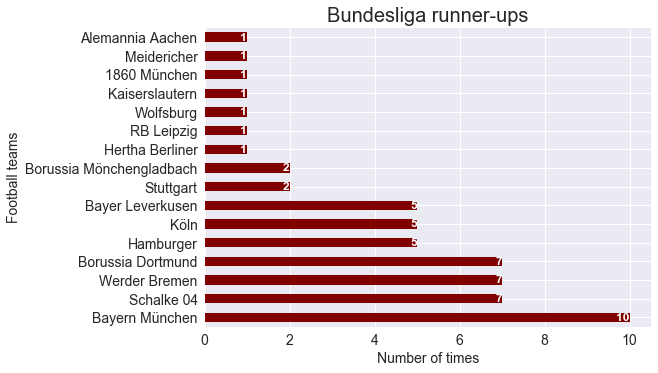

In [228]:
# Bundesliga runner-ups
second_position = df_scores[df_scores['position'] == 2].club.value_counts()

# plot labels indicating the number times the team was runner-up
for i, value in enumerate(second_position):
     plt.text(value, i, str(value), horizontalalignment='right', verticalalignment='center', weight='bold', color='white', fontsize=12)

# plot the results using an horizontal bar plot
second_position.plot(kind='barh', color='maroon')

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Number of times', fontsize=14)
plt.ylabel('Football teams', fontsize=14)
plt.title('Bundesliga runner-ups', fontsize=20);

In the season 2016–17, RB Leipzig finished second in the Bundesliga. The club was just founded in 2009 and is currently one of the leading teams in Germany mainly because of the significant investments made by the company Red Bull.

In [230]:
# football teams that have never won the league but they were on one or more occasions runner-ups
first_position = set(df_scores[df_scores['position'] == 1].club.unique())

second_position = set(df_scores[df_scores['position'] == 2].club.unique())

second_position.difference(first_position)

{'Alemannia Aachen',
 'Bayer Leverkusen',
 'Hertha Berliner',
 'Meidericher',
 'RB Leipzig',
 'Schalke 04'}

# Total number of seasons in the first division (Top 10)
Werder Bremen holds the record for having played the most seasons in the German league. They have played the Bundesliga in 56 of its 57 seasons, being relegated to the second division only on one occasion. Bayern München has played in the Bundesliga uninterrupted since 1965, and Hamburger from 1963 until 2018, both of them 55 seasons in total. Apart from the aforementioned clubs, Borussia Dortmund, Stuttgart,  Borussia Mönchengladbach, Schalke 04, and Eintracht Frankfurt have also participated in the German league more than 50 seasons.

Text(0, 0.5, 'Number of seasons')

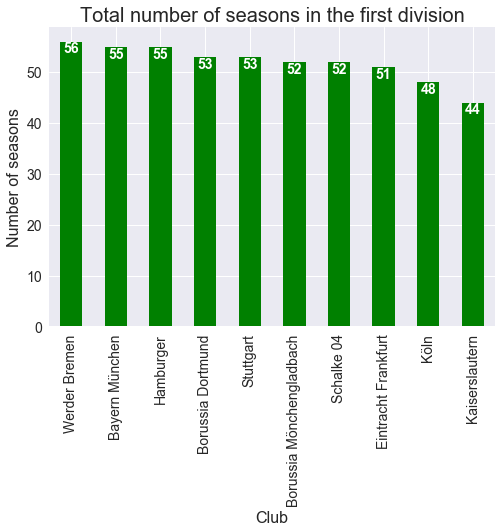

In [298]:
# total number of seasons in the first division (top 10)
number_of_seasons = df_scores.groupby('club').count().position.sort_values(ascending=False).head(10)

# plot labels indicating the number of seasons in the first division
for i,value in enumerate(number_of_seasons):
     plt.text(i, value, str(value), horizontalalignment='center',verticalalignment='top', weight='bold', color='white', fontsize=14)

# plot the results using an horizontal bar plot
number_of_seasons.plot(kind='bar', color='green')

# modify the ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Total number of seasons in the first division', fontsize=20)
plt.xlabel('Club', fontsize=16)
plt.ylabel('Number of seasons', fontsize=16)

In the last season (2019–20), all the teams from the image above played in the Bundesliga with the exception of Hamburger, Stuttgart, and Kaiserslautern.

# Number of teams in the Bundesliga per season
The Bundesliga began with 16 teams in 1963 and it was enlarged to 18 teams in 1965. Since then, the number of clubs in the Bundesliga has remained unchanged with the exception of the season 1991–92. In that season, the league was temporarily expanded (20 teams) to accommodate the clubs from former East Germany.

Text(0, 0.5, 'Number of clubs')

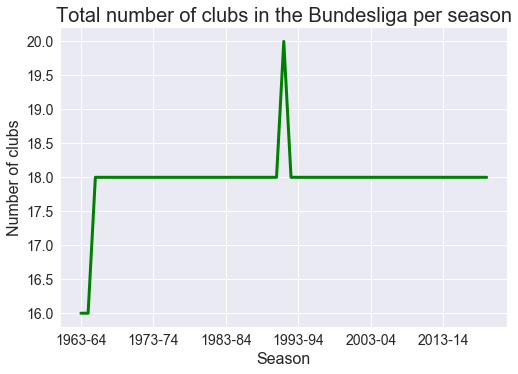

In [299]:
# number of teams in the Bundesliga per season
number_clubs = df_scores.groupby('season').count().club

# plot the results using a line plot
number_clubs.plot(linewidth=3, color='g')

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Total number of clubs in the Bundesliga per season', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Number of clubs', fontsize=16)

Currently, 18 teams play in the German league. The same number of teams participate in the Primeira Liga (Portugal), and the Eredivisie (Holand). On the contrary, 20 teams take part in the Serie A (Italy), the Liga (Spain), the Ligue 1 (France), and the Premier League (England). Nowadays, there is still a debate over whether two more teams should be included in the Bundesliga to be in line with the most important European leagues.


# Evolution of the number of leagues
The Bundesliga has been clearly dominated throughout its history by Bayern München winning more than half of the total leagues. Since 2000, Bayern München has won 14 out of 20 leagues, being for other teams almost impossible to compete against the Reds. But has the Bundesliga always been dominated by Bayern München? When did the Bayern's hegemony begin? Let's clarify all questions with a simple plot.

The following interactive line chart shows the evolution of the number of leagues by team. To properly visualize the results, you can deactivate some traces and only visualize those you are interested in. You can show or hide traces by clicking on their associated legend item. Additionally, you can get information about a data point (season and number of leagues) by hovering the mouse over it.

In [300]:
# get a table were the winner is indicated with a 1 and the rest with a zero
winner_season = pd.get_dummies(df_scores[df_scores['position'] == 1][['club', 'season']], columns=['club'], prefix='', prefix_sep='')

winner_season

,season,1860 München,Bayern München,Borussia Dortmund,Borussia Mönchengladbach,Eintracht Braunschweig,Hamburger,Kaiserslautern,Köln,Nürnberg,Stuttgart,Werder Bremen,Wolfsburg
0,2019-20,0,1,0,0,0,0,0,0,0,0,0,0
0,2018-19,0,1,0,0,0,0,0,0,0,0,0,0
0,2017-18,0,1,0,0,0,0,0,0,0,0,0,0
0,2016-17,0,1,0,0,0,0,0,0,0,0,0,0
0,2015-16,0,1,0,0,0,0,0,0,0,0,0,0
0,2014-15,0,1,0,0,0,0,0,0,0,0,0,0
0,2013-14,0,1,0,0,0,0,0,0,0,0,0,0
0,2012-13,0,1,0,0,0,0,0,0,0,0,0,0
0,2011-12,0,0,1,0,0,0,0,0,0,0,0,0
0,2010-11,0,0,1,0,0,0,0,0,0,0,0,0


In [301]:
# set season as index of the data frame
winner_season.set_index('season', inplace=True)

winner_season

,1860 München,Bayern München,Borussia Dortmund,Borussia Mönchengladbach,Eintracht Braunschweig,Hamburger,Kaiserslautern,Köln,Nürnberg,Stuttgart,Werder Bremen,Wolfsburg
season,,,,,,,,,,,,
2019-20,0,1,0,0,0,0,0,0,0,0,0,0
2018-19,0,1,0,0,0,0,0,0,0,0,0,0
2017-18,0,1,0,0,0,0,0,0,0,0,0,0
2016-17,0,1,0,0,0,0,0,0,0,0,0,0
2015-16,0,1,0,0,0,0,0,0,0,0,0,0
2014-15,0,1,0,0,0,0,0,0,0,0,0,0
2013-14,0,1,0,0,0,0,0,0,0,0,0,0
2012-13,0,1,0,0,0,0,0,0,0,0,0,0
2011-12,0,0,1,0,0,0,0,0,0,0,0,0


In [302]:
# (1) transpose the data frame (first row - first season),(2) do a cumulative sum to obtain the evolution of the number of leagues
evolution_leagues = winner_season.loc[::-1].cumsum()

evolution_leagues.head(10)

,1860 München,Bayern München,Borussia Dortmund,Borussia Mönchengladbach,Eintracht Braunschweig,Hamburger,Kaiserslautern,Köln,Nürnberg,Stuttgart,Werder Bremen,Wolfsburg
season,,,,,,,,,,,,
1963-64,0,0,0,0,0,0,0,1,0,0,0,0
1964-65,0,0,0,0,0,0,0,1,0,0,1,0
1965-66,1,0,0,0,0,0,0,1,0,0,1,0
1966-67,1,0,0,0,1,0,0,1,0,0,1,0
1967-68,1,0,0,0,1,0,0,1,1,0,1,0
1968-69,1,1,0,0,1,0,0,1,1,0,1,0
1969-70,1,1,0,1,1,0,0,1,1,0,1,0
1970-71,1,1,0,2,1,0,0,1,1,0,1,0
1971-72,1,2,0,2,1,0,0,1,1,0,1,0


In [304]:
import plotly
import chart_studio.plotly as py
import plotly.graph_objects as go
import chart_studio
chart_studio.tools.set_credentials_file(username='aiglesiamor', api_key='##########') ### SET YOUR API PASSWORT!!! IF YOU DO NOT HAVE ONE, CREATE IT :)

# convert season to integer type
season = [int(season[:4])+1 for season in evolution_leagues.index]
# colors for the line plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'darkblue', 'salmon', 'green', 'red', 'black', 'springgreen', 'pink']

# create a figure 
fig = go.Figure()

# add line plots - a line per team
for index, column in enumerate(evolution_leagues.columns):
    fig.add_trace(go.Scatter(x=season, y=evolution_leagues[column],
                        mode='lines+markers',
                        name=column,
                        line_color=colors[index],
                        hovertemplate = 'Leagues = '+'%{y} <br>' +
                        'Season  = ' + '%{x}'))

# Title and labels
fig.update_layout(title='Evolution of the number of leagues',
                   xaxis_title='Season',
                   yaxis_title='Number of leagues',
                   plot_bgcolor='white')


py.iplot(fig, filename = 'evolution_leagues_bundesliga', sharing='public')

In [242]:
py.plot(fig, filename = 'evolution_leagues_bundesliga', sharing='public')

'https://plotly.com/~aiglesiamor/57/'

The Bundesliga was won by seven teams in its first seven seasons: Köln (1963–64), Werder Bremen (1964–65), 1860 München (1965–66), Eintracht Braunschweig (1966–67), Nürnberg (1967–68), Bayern München (1968–69), and Borussia Mönchengladbach(1969–70).

In the seventies, the German league was dominated by two clubs, none of them founding members of the Bundesliga in 1963: Borussia Mönchengladbach and Bayern München. Only these two clubs had the honor of lifting the Bundesliga trophy from 1969 until 1977. 

Borussia Mönchengladbach's glory days were in the seventies.  Under the supervision of Hennes Weisweiler (1964–1975) and Udo Lattek (1975–1979), the Foals won five Bundesliga trophies, two UEFA Cups, and they even reached the Championsleague final in 1977, which they lost against Liverpool.

From the mid-eighties on, Bayern Munich has totally dominated the Bundesliga. So far, they have won more titles than all the other teams put together. However, Bayern's hegemony has been broken several times since then. In the 90s, Kaiserslautern got their hands in the trophy two times (1990–91 and 1997–98), winning the second league just after being promoted from the 2 Bundesliga. In 2008, after defeating Bayer by 2 points, Wolfsburg won their first Bundesliga and qualified for the first time in their history for the Champions League. The last team that challenged Bayern's hegemony was Borussia Dortmund under the charismatic guidance of Jurgen Klopp way back in 2012, the last year the Bundesliga had a champion that was not Bayern. Since then, Bayern München has won the Bundesliga eight times in a row. Nowadays, Bayern München is Germany's most successful football club both at home and in Europe.

All the aforesaid can also be observed in the following plot which shows the number of leagues by team and decade.

In [305]:
# new column indicating the decade
# create a mapping dictionary 
years = list(range(1920,2021))

decades = []
for decade in range(1920,2030,10):
    decades.extend([decade]*10)

mapping = dict()
for year, decade in zip(years,decades):
    key = str(year) + '-' + str(year+1)[-2:]
    value = str(decade) + '-' + str(decade+10)
    mapping[key] = value 

# mapping dictionary 
print(mapping)

{'1920-21': '1920-1930', '1921-22': '1920-1930', '1922-23': '1920-1930', '1923-24': '1920-1930', '1924-25': '1920-1930', '1925-26': '1920-1930', '1926-27': '1920-1930', '1927-28': '1920-1930', '1928-29': '1920-1930', '1929-30': '1920-1930', '1930-31': '1930-1940', '1931-32': '1930-1940', '1932-33': '1930-1940', '1933-34': '1930-1940', '1934-35': '1930-1940', '1935-36': '1930-1940', '1936-37': '1930-1940', '1937-38': '1930-1940', '1938-39': '1930-1940', '1939-40': '1930-1940', '1940-41': '1940-1950', '1941-42': '1940-1950', '1942-43': '1940-1950', '1943-44': '1940-1950', '1944-45': '1940-1950', '1945-46': '1940-1950', '1946-47': '1940-1950', '1947-48': '1940-1950', '1948-49': '1940-1950', '1949-50': '1940-1950', '1950-51': '1950-1960', '1951-52': '1950-1960', '1952-53': '1950-1960', '1953-54': '1950-1960', '1954-55': '1950-1960', '1955-56': '1950-1960', '1956-57': '1950-1960', '1957-58': '1950-1960', '1958-59': '1950-1960', '1959-60': '1950-1960', '1960-61': '1960-1970', '1961-62': '196

In [307]:
# use the dictionary to create a new column indicating the decade
df_scores['decade']= df_scores.season.map(mapping)

# check that the modification has been carried out properly
df_scores.head()

,position,club,points,played,won,drawn,lost,goals_for,goals_against,yellow_card,red_card,season,decade
0,1,Bayern München,82,34,26,4,4,100,32,52,3,2019-20,2010-2020
1,2,Borussia Dortmund,69,34,21,6,7,84,41,48,1,2019-20,2010-2020
2,3,RB Leipzig,66,34,18,12,4,81,37,50,3,2019-20,2010-2020
3,4,Borussia Mönchengladbach,65,34,20,5,9,66,40,74,3,2019-20,2010-2020
4,5,Bayer Leverkusen,63,34,19,6,9,61,44,58,6,2019-20,2010-2020


In [308]:
# number of leagues by decade and club - the indeces contain the decades and the columns contain the clubs
evolution_decades = df_scores[df_scores['position'] == 1].groupby(['decade', 'club']).count().position.unstack()

evolution_decades

club,1860 München,Bayern München,Borussia Dortmund,Borussia Mönchengladbach,Eintracht Braunschweig,Hamburger,Kaiserslautern,Köln,Nürnberg,Stuttgart,Werder Bremen,Wolfsburg
decade,,,,,,,,,,,,
1960-1970,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN
1970-1980,NaN,4.0,NaN,4.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1980-1990,NaN,6.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN
1990-2000,NaN,4.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN
2000-2010,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
2010-2020,NaN,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Number of leagues')

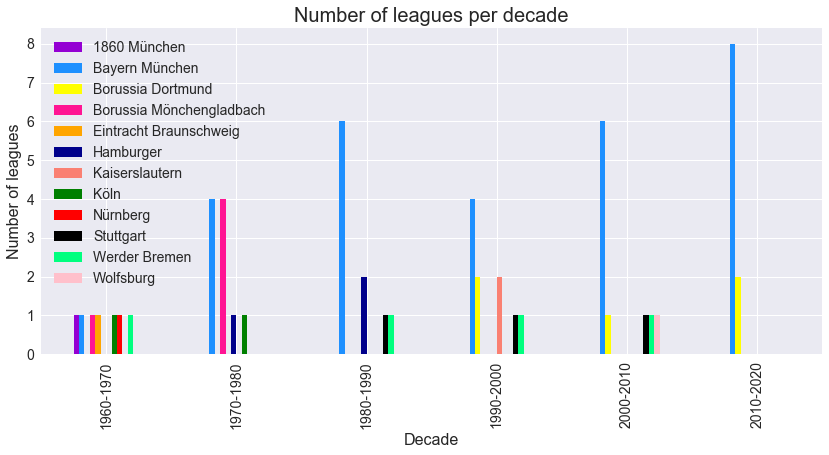

In [309]:
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'darkblue', 'salmon', 'green', 'red', 'black', 'springgreen', 'pink']

# plot the results using a bar plot
evolution_decades.plot(kind='bar', figsize=(14,6), color=colors)

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# define the title and the labels
plt.title('Number of leagues per decade', fontsize=20)
plt.xlabel('Decade', fontsize=16)
plt.ylabel('Number of leagues', fontsize=16)

# Historical performance of teams 
The following interactive plot shows the historical performance (position in the ranking over the year) of all teams that have played in the Bundesliga. To display the historical data, we have to select the team using the drop-down list located in the upper left corner. We will notice that in some seasons there is no data available, meaning the selected team has not participated in the first division in that particular year. Feel free to check the performance of the teams you are more interested in 💚

In [310]:
position_teams = df_scores.pivot(index='season',columns='club',values='position')

In [312]:
# x-axis of the plot season 
season = [int(season[:4])+1 for season in position_teams.index]
# y-axis of the plot teams - we sort the teams so that they appear in alphabetical order 
teams = np.sort(df_scores.club.unique())

# create a figure
fig = go.Figure()

# add line plots - a line per team
for index, team in enumerate(teams):
    fig.add_trace(go.Scatter(x=season, y=position_teams[team],
                        mode='lines+markers',
                        name=team, 
                        line_color='rgb({}, {}, {})'.format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)),
                        visible=False,
                        hovertemplate = 'Position = '+'%{y} <br>' +
                        'Season  = ' + '%{x}'))

# implement a dropdown list
list_button = []

list_button.append(dict(label = 'None',
     method = 'update',
     args = [{'visible': False},
             {'title': team,
              'showlegend':False}]))

for index, team in enumerate(teams):
    visible = [True if number==index else False for number in range(len(teams))] 
    list_button.append(dict(label = team,
                     method = 'update',
                     args = [{'visible': visible},
                             {'title': 'Position in the ranking by season: ' + team,
                              'showlegend':True}]))    

# Title and labels
fig.update_layout(title='Position in the ranking',
                   xaxis_title='Season',
                   yaxis_title='Position',
                   plot_bgcolor='white',
                   updatemenus=[go.layout.Updatemenu(active=0,
                                                    buttons=list_button)])



py.iplot(fig, filename = 'position_bundesliga', sharing='public')

In [204]:
py.plot(fig, filename = 'position_bundesliga', sharing='public')

'https://plotly.com/~aiglesiamor/49/'

# Yellow and red cards in La Liga
Yellow and red cards in the Bundesliga
There is one thing that most football fans across the world take for granted: the use cards. However, it was not until 1970 at the World Cup in Mexico that the yellow and red card system was used for the first time in football. The system was invented in 1966 by the English referee Ken Aston who noticed that many times football players did not understand or just ignored the warnings made by referees which at the time were orally communicated. Then, inspired by the colors of the traffic lights (red and yellow) and their meanings, Aston created a color-coding scheme to clearly indicate that a football player has been cautioned or expelled. 

The use of yellow and red cards was implemented in the Bundesliga in the season 1970–71. A few years later in 1991, a combined yellow/red card was introduced in the German league. The player receives a yellow/red card after getting a second yellow card in the same game, implying that he has to leave the game and is excluded for the next match. On the contrary, the player is barred from the competition for a longer time when receiving directly a red card. Additionally, if a player accumulates five yellow cards, we will also be excluded from the competition for the next game.

The following plot shows the total number of red cards per season. As I previously said, before the year 1971, the referee announced to the player his fines verbally. In the figure below, prior to 1971, red cards represent football players that were expelled during the match only with words (without using cards). Prior to the use of cards, players often did not receive penalties. Only in special cases (really strong fouls), football players were expelled from the game.

Text(0, 0.5, 'Total number of red cards')

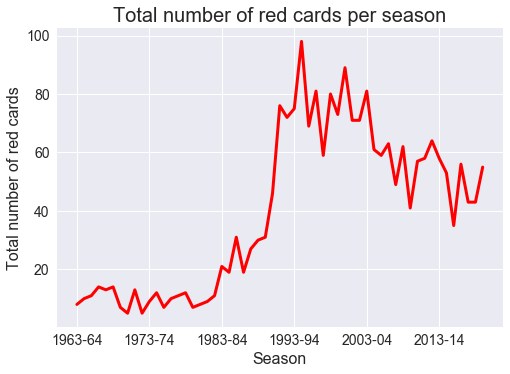

In [313]:
# number of red cards per season
red_cards = df_scores.groupby('season').sum().red_card

# plot the results using a line plot
red_cards.plot(linewidth=3, color='r')

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Total number of red cards per season', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Total number of red cards', fontsize=16)

We observe a growing tendency (particularly fast in the 80s) until the mid-nineties. From that moment on, the total amount of red cards is slowly decreasing over time.
Likewise, the plot below shows the total number of yellow cards per season.

Text(0, 0.5, 'Total number of yellow cards')

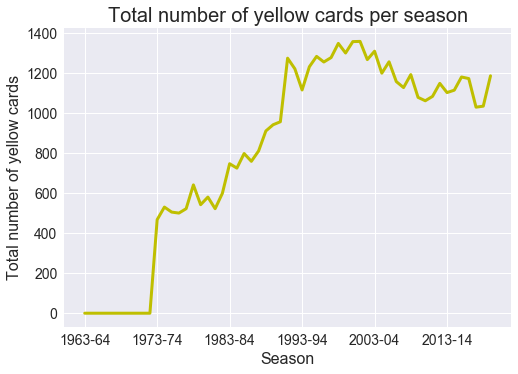

In [314]:
# number of yellow cards per season
yellow_cards = df_scores.groupby('season').sum().yellow_card

# plot the results using a line plot
yellow_cards.plot(linewidth=3, color='y')

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Total number of yellow cards per season', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Total number of yellow cards', fontsize=16)

The total number of yellow cards per season has grown steadily from 1971 until the nineties. From this time on, the number of cards remains nearly constant around 1200 cards per season.

In a previous article, we have analyzed the Spanish league. After comparing the results, we can observe that the evolution of the number of red and yellow cards over the years follows the same pattern in both leagues as shown below. However, the players in the Spanish league receive substantially more cards than players in the Bundesliga (although they play only two more games).

In [315]:
df_spain = pd.read_csv('spanish_league.csv')

df_spain.head()

,position,club,points,played,won,drawn,lost,goals_for,goals_against,yellow_card,red_card,season,decade
0,1,Real Madrid,87,38,26,9,3,70,25,79,4,2019-20,2010-2020
1,2,Barcelona,82,38,25,7,6,86,38,89,6,2019-20,2010-2020
2,3,Atlético de Madrid,70,38,18,16,4,51,27,91,3,2019-20,2010-2020
3,4,Sevilla,70,38,19,13,6,54,34,97,1,2019-20,2010-2020
4,5,Villarreal,60,38,18,6,14,63,49,78,1,2019-20,2010-2020


Text(0, 0.5, 'Total number of red cards')

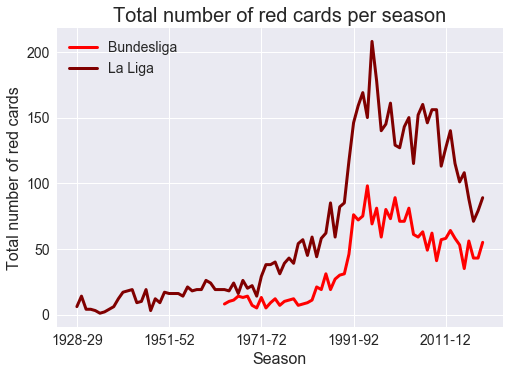

In [282]:
# number of red cards per season (Bundesliga)
red_cards = df_scores.groupby('season').sum().red_card

# number of red cards per season (Bundesliga)
red_cards_spain = df_spain.groupby('season').sum().red_card

# concatenate both series
red_all = pd.concat([red_cards, red_cards_spain], axis=1).sort_index()

# plot the results using a line plot
red_all.plot(linewidth=3, color=['red', 'maroon'])

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Bundesliga', 'La Liga'], fontsize=14)

# define the title and the labels
plt.title('Total number of red cards per season', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Total number of red cards', fontsize=16)

Text(0, 0.5, 'Total number of yellow cards')

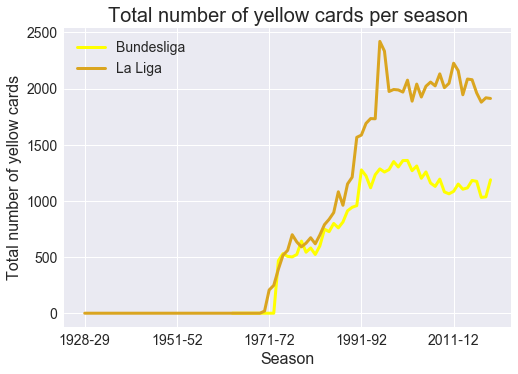

In [281]:
# number of yellow cards per season (Bundesliga)
yellow_cards = df_scores.groupby('season').sum().yellow_card

# number of yellow cards per season (Bundesliga)
yellow_cards_spain = df_spain.groupby('season').sum().yellow_card

# conatenate both series
yellow_all = pd.concat([yellow_cards, yellow_cards_spain], axis=1).sort_index()

# plot the results using a line plot
yellow_all.plot(linewidth=3, color=['yellow', 'goldenrod'])

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Bundesliga', 'La Liga'], fontsize=14)

# define the title and the labels
plt.title('Total number of yellow cards per season', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Total number of yellow cards', fontsize=16)

Now, maybe you're wondering: What teams received more cards in the last seasons? 
The following plots show the average number of red and yellow cards by team from 2000 until 2020. As shown below, Bayern Munich is one of the teams that receive on average fewer cards per season. The same happens in Spain with Real Madrid and Barcelona, as we analyzed in prior articles.

Text(0, 0.5, 'Average number of yellow cards')

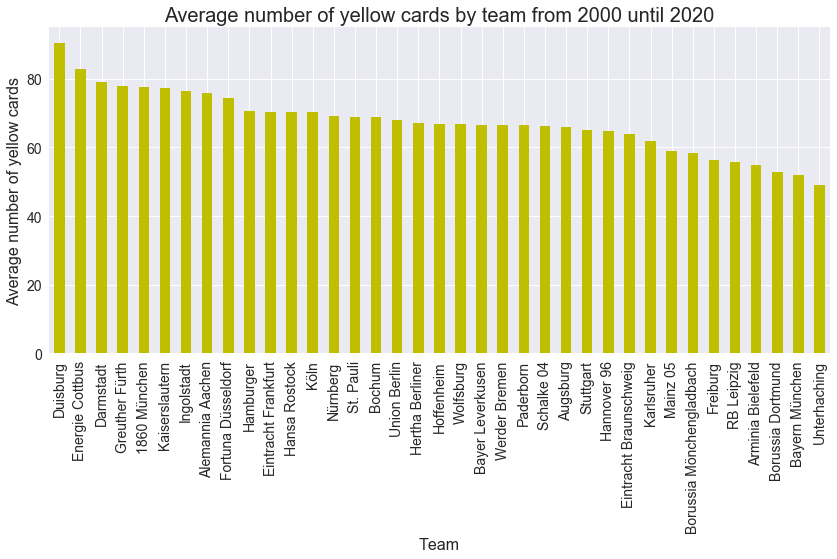

In [243]:
# average number of yellow cards by team from 2000 until 2020
yellow_from_1990 = df_scores[df_scores['season']>='2000-01'].groupby('club').mean().yellow_card.sort_values(ascending=False)

# plot the results using a bar plot
yellow_from_1990.plot(kind='bar', color='y', figsize=(14,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Average number of yellow cards by team from 2000 until 2020', fontsize=20)
plt.xlabel('Team', fontsize=16)
plt.ylabel('Average number of yellow cards', fontsize=16)

Text(0, 0.5, 'Average number of red cards')

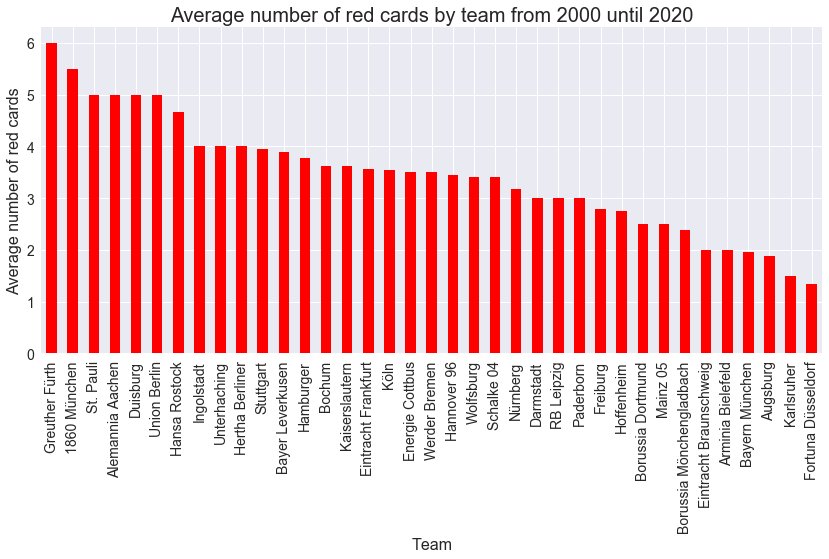

In [244]:
# average number of red cards by team from 2000 until 2020
red_from_1990 = df_scores[df_scores['season']>='2000-01'].groupby('club').mean().red_card.sort_values(ascending=False)

# plot the results using a bar plot 
red_from_1990.plot(kind='bar', color='r', figsize=(14,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# define the title and the labels
plt.title('Average number of red cards by team from 2000 until 2020', fontsize=20)
plt.xlabel('Team', fontsize=16)
plt.ylabel('Average number of red cards', fontsize=16)

# Performance in the last 10 years (Bayern München vs Borussia Dortmund)
Bayern Munich has totally dominated the Bundesliga in the last 10 years winning 8 titles in a row. During that time, the only team that has challenged Bayern's hegemony has been Borussia Dortmund; however, Bayern München has demonstrated stronger defensive skills than its direct rival.
The following plots show the goals for and against from 2010 until 2020 of both teams. In the two seasons in which Dortmund won the title (2010–11 and 2011–12), the black and yellows were defensively as good as the Reds, even much better in the season 2011. However, since then, Bayern München has shown a greater balance in attack and defense which explains its success in the last eight seasons.

Text(0, 0.5, 'Goals')

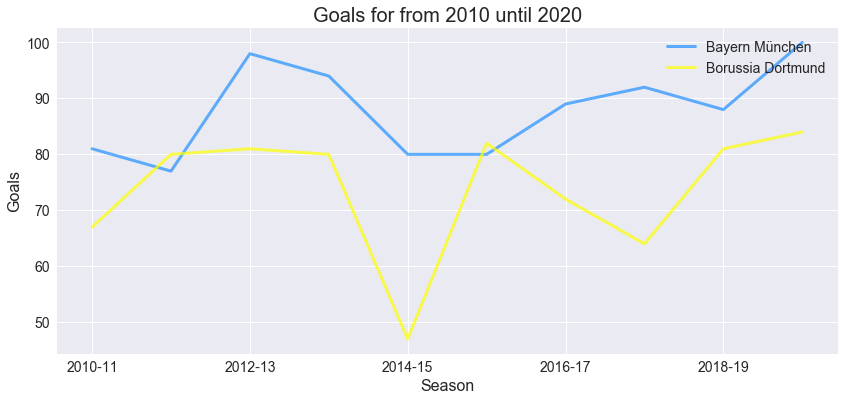

In [286]:
# data frame containing the goals for 
goals_for = df_scores.pivot(index='season', columns='club', values='goals_for')

# select the data from season 2010
seasons = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
teams = ['Bayern München', 'Borussia Dortmund']

# plot the results using a line plot
colors = ['dodgerblue', 'yellow']
goals_for.loc[seasons, teams].plot(alpha=0.7, linewidth=3, color=colors, figsize=(14,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper right')

# define the title and the labels
plt.title('Goals for from 2010 until 2020', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Goals', fontsize=16)

Text(0, 0.5, 'Goals')

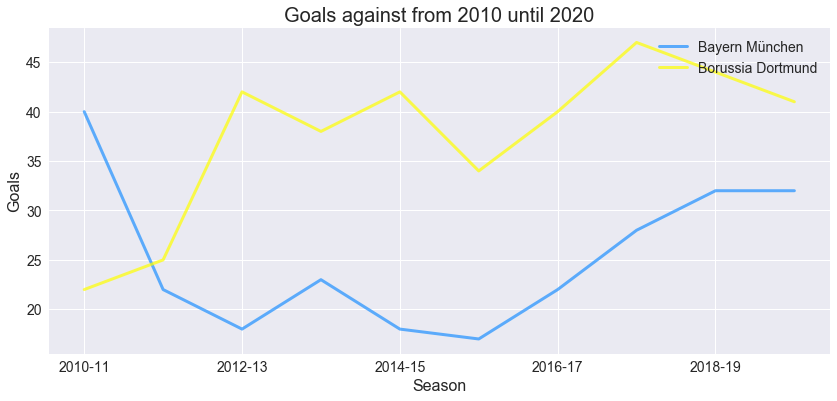

In [287]:
# data frame containing the goals for 
goals_against = df_scores.pivot(index='season', columns='club', values='goals_against')

# select the data from season 2010
seasons = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
teams = ['Bayern München', 'Borussia Dortmund']

# plot the results using a line plot
colors = ['dodgerblue', 'yellow']
goals_against.loc[seasons, teams].plot(alpha=0.7, linewidth=3, color=colors, figsize=(14,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper right')

# define the title and the labels
plt.title('Goals against from 2010 until 2020', fontsize=20)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Goals', fontsize=16)

# More analysis!
If you have enjoyed reading this article and you want to know more about other leagues 😃, take a glimpse at the analysis of the Spanish league :)

https://towardsdatascience.com/analysis-of-the-spanish-football-league-la-liga-7c636a9317b3

Thanks for reading ❤️
Amanda